In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nnfs.models import BaseModel
from nnfs.layers import LinearLayer
from nnfs.funcs import CrossEntropy
from nnfs.optimizers import SGD

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The classic example used for basic machine learning models is the MNIST dataset, which contains about 60,000 training examples of handwritten digits, with the goal of classifying the digit from the image. To note, the data used in this example is not included in the repository, but it is available [here](https://drive.google.com/file/d/11ZiNnV3YtpZ7d9afHZg0rtDRrmhha-1E/view). To run this next code block, place the data in `examples/data/mnist/` with the appropriate filenames.

The model will consider the vectorized form, that is, treating the 28x28 images as vectors of length 784 instead. As such, no convolutions will be required, but it will also lose access to any information gained from the 2D nature of the images.

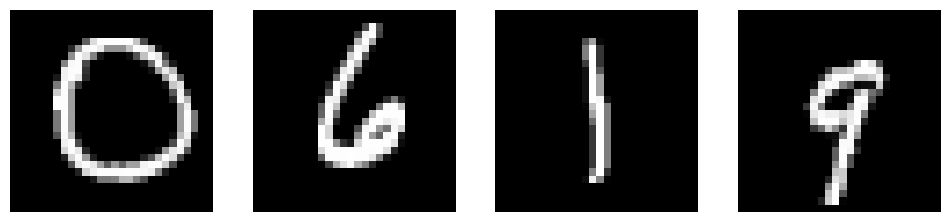

[0 6 1 9]


In [2]:
# Load datasets into numpy arrays
with open("data/mnist/train-images.idx3-ubyte", "rb") as file:
    train_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)
with open("data/mnist/t10k-images.idx3-ubyte", "rb") as file:
    test_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

with open("data/mnist/train-labels.idx1-ubyte", "rb") as file:
    train_labels = np.frombuffer(file.read(), np.uint8, offset=8)
with open("data/mnist/t10k-labels.idx1-ubyte", "rb") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)


def draw_mnist_num(arr):
    """Helper function to draw MNIST numbers"""
    # Number of graphs
    nums = arr.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(arr[i].reshape(28, 28), cmap="gray")
        axes[i].set_axis_off()
    fig.set_size_inches(3 * nums, 3)
    plt.show()

# Confirm images and labels are aligned
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
print(train_labels[rand_inds])

# Adjust labels to correspond to class output
train_label_arr = np.zeros((train_labels.shape[0], 10), dtype=int)
train_label_arr[np.arange(train_labels.shape[0]), train_labels] = 1
test_label_arr = np.zeros((test_labels.shape[0], 10), dtype=int)
test_label_arr[np.arange(test_labels.shape[0]), test_labels] = 1

# Convert from (0, 255) to (0, 1) range
train_image = train_image.copy() / 256
test_image = test_image.copy() / 256

The example model is a two layer model, using 30 nodes in the first layer, and 10 nodes for the output layer. This is small enough (0.1 MB) to easily fit on any computer and can be trained without the use of a GPU. That being said, a more complex model (i.e, more layers or more parameters) could potentially be more accurate but will require more time or processing power to train.

In [3]:
# Set up model with two layers
layers = [
    LinearLayer((784), (30)),
    LinearLayer((30), (10))
]

# Train model
model = BaseModel(layers, optimizer = SGD(learning_rate = 3.0))
model.train(
    [train_image, train_label_arr],
    [test_image, test_label_arr],
    CrossEntropy(),
    batch_size = 16,
    epochs = 15,
    full_test = True
)

Initialized model with 23860 parameters (93.2 KB).
Start of Epoch 1:


100%|██████████| 3750/3750 [00:03<00:00, 1056.20it/s]


Average loss at epoch 1: 0.42587
Start of Epoch 2:


100%|██████████| 3750/3750 [00:03<00:00, 1174.48it/s]


Average loss at epoch 2: 0.37106
Start of Epoch 3:


100%|██████████| 3750/3750 [00:03<00:00, 1209.12it/s]


Average loss at epoch 3: 0.33930
Start of Epoch 4:


100%|██████████| 3750/3750 [00:02<00:00, 1263.41it/s]


Average loss at epoch 4: 0.35240
Start of Epoch 5:


100%|██████████| 3750/3750 [00:03<00:00, 1165.86it/s]


Average loss at epoch 5: 0.30392
Start of Epoch 6:


100%|██████████| 3750/3750 [00:03<00:00, 1010.57it/s]


Average loss at epoch 6: 0.31515
Start of Epoch 7:


100%|██████████| 3750/3750 [00:03<00:00, 1232.74it/s]


Average loss at epoch 7: 0.29986
Start of Epoch 8:


100%|██████████| 3750/3750 [00:03<00:00, 1240.82it/s]


Average loss at epoch 8: 0.29859
Start of Epoch 9:


100%|██████████| 3750/3750 [00:03<00:00, 1180.18it/s]


Average loss at epoch 9: 0.30334
Start of Epoch 10:


100%|██████████| 3750/3750 [00:03<00:00, 1057.38it/s]


Average loss at epoch 10: 0.30016
Start of Epoch 11:


100%|██████████| 3750/3750 [00:03<00:00, 967.79it/s] 


Average loss at epoch 11: 0.27192
Start of Epoch 12:


100%|██████████| 3750/3750 [00:03<00:00, 997.26it/s] 


Average loss at epoch 12: 0.28990
Start of Epoch 13:


100%|██████████| 3750/3750 [00:03<00:00, 1070.94it/s]


Average loss at epoch 13: 0.31107
Start of Epoch 14:


100%|██████████| 3750/3750 [00:03<00:00, 1074.30it/s]


Average loss at epoch 14: 0.28664
Start of Epoch 15:


100%|██████████| 3750/3750 [00:03<00:00, 1182.46it/s]


Average loss at epoch 15: 0.31225
Training took  0h  1m  2s.


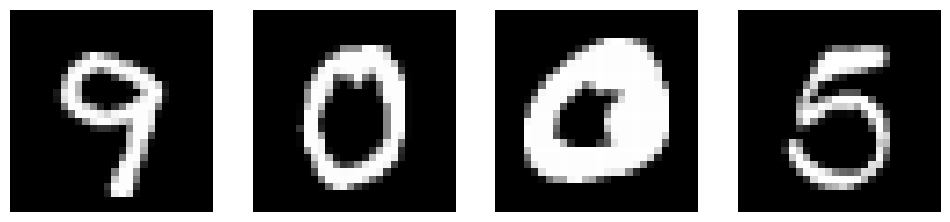

Model Guess: [9 0 0 5]
Actual Values: [9 0 0 5]
The model accuracy over the entire test set is 94.52%.


In [4]:
# Check if model can accurately label images
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
model_guess = np.argmax(model.forward(train_image[rand_inds]), axis=1)
actual_val = train_labels[rand_inds]
print(f"Model Guess: {model_guess}")
print(f"Actual Values: {actual_val}")

# Find percent accuracy over entire test set
test_vals = model.forward(test_image)
test_accuracy = np.count_nonzero(np.argmax(test_vals, axis=1) == test_labels) / test_image.shape[0]
print(f"The model accuracy over the entire test set is {100 * test_accuracy:.2f}%.")

As shown, the model has a ~95% accuracy despite only being 0.1 MB and also having been trained in under 5 minutes. This accuracy is still not as high as human accuracy (around 98%), but it comes quite close and it is much faster.